In [2]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear,sigmoid,relu
import matplotlib.pyplot as plt

In [3]:
def plt_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
def activation_func():
    fig, axs = plt.subplots(1, 3, figsize=(5, 4))
    fig.tight_layout(pad=0.13,rect=[1, 0.3, 3, 0.91])
    axs[0].plot(x1,y1)
    axs[0].set_title('Linear')
    axs[1].plot(x1,y2)
    axs[1].set_title('Sigmoid')
    axs[2].plot(x1,y3)
    axs[2].set_title('ReLU')

In [5]:
#Plotting the activation functions
x1=np.arange(-5,5.001,0.001)
y1=x1
y2=1/(1+np.exp(-x1))
y3=np.zeros(x1.shape[0])
ind=0
for i in x1:
    if(i>0):
        y3[ind]=i
    else:
        y3[ind]=0
    ind+=1

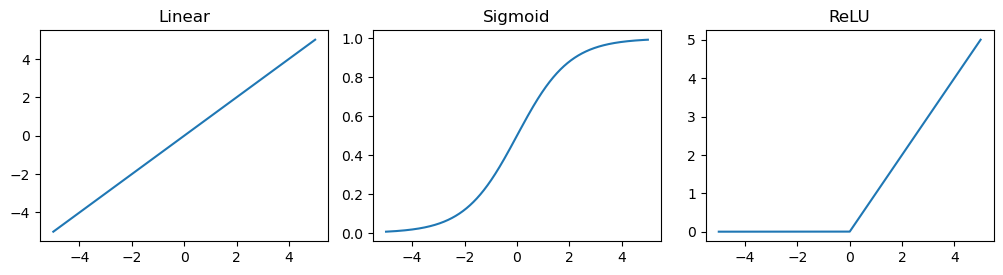

In [6]:
#Plotting the Activation Functions for a better Intuition 
activation_func()

In [8]:
# Incase i wanted the output in probability format
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """  
    a=np.zeros(z.shape[0])
    exp=np.exp(z).sum()
    for i in range(z.shape[0]):
        a[i]=np.exp(z[i])/exp
    return 

In [9]:
# Readind Training Data set 
df=pd.read_csv('MNIST_DataSet\mnist_train.csv',header=None)
df.shape

(60000, 785)

In [10]:
df_train=df.iloc[:5000,:] # taking the first 5000 rows only for fast combutaion
df_test=df.iloc[5000:6000 ,:]

In [11]:
y_train=(df_train.iloc[:,0]).to_numpy().reshape(5000,1)
x_train=(df_train.iloc[:,1:786]).to_numpy()
x_test=(df_test.iloc[:,1:786]).to_numpy()
y_test=(df_test.iloc[:,0]).to_numpy().reshape(1000,1)

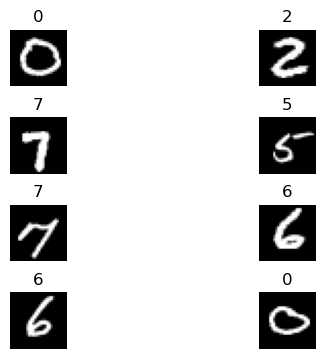

In [12]:
# Visualize the Data for a better understanding 
m,n =x_train.shape
fig, axs = plt.subplots(4, 2, figsize=(5, 4))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i in range(4):
    for j in range(2):
        random_index=np.random.randint(m)
        axs[i,j].imshow(x_train[random_index].reshape((28,28)),cmap='gray')  #Reshape each row to a 28*28 pixel 
        axs[i,j].set_title(y_train[random_index,0],)                         #Photo
        axs[i,j].set_axis_off()

In [13]:
#Creating the Neural Network using TensorFlow
tf.random.set_seed(1234) # for consistent results
model= Sequential(
   [   tf.keras.Input(shape=(784,)),
       Dense(25,activation='relu',name='L1'),
       Dense(15,activation='relu',name='L2'),
       Dense(10,activation='linear',name='L3')
   ],
    name='my_model')

In [14]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
[layer1, layer2, layer3] = model.layers

In [16]:
# Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [17]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
history= model.fit(
    x_train,y_train,
    epochs=80
)

Epoch 1/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 13.0351
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2259
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0910
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9157
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7045
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5317
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4527
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3571
Epoch 9/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3038
Epoch 10/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2293
Epoch 11/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1665
Epoch 12/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1488
Epoch 13/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0546
Epoch 14/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9705
Epoch 15/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - l

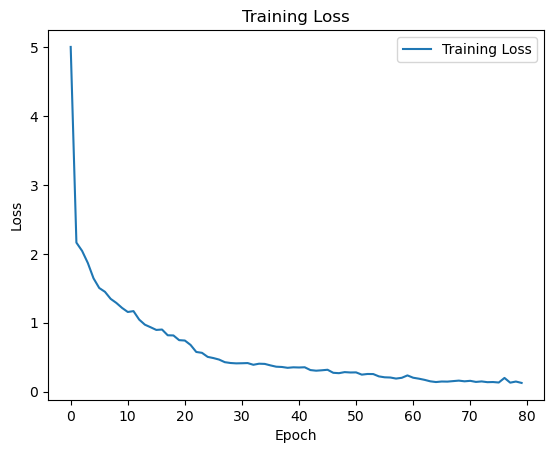

In [18]:
# See how the 'Loss' of the Neural Network is reducing
plt_loss(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
 predicting a Nine: 
[[ -79.858246  -116.44959    -25.308485   -32.069557    -4.6674395
   -11.056584   -31.183182    -6.507496   -85.48981      3.9565911]]
 Largest Prediction index: 9


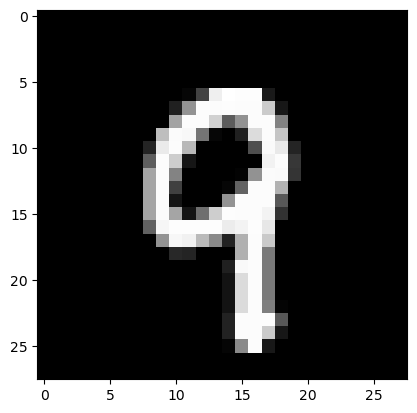

In [19]:
image_of_nine = x_train[350]
plt.imshow(image_of_nine.reshape((28,28)),cmap='gray')
prediction = model.predict(image_of_nine.reshape(1,784))  # prediction
print(f" predicting a Nine: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


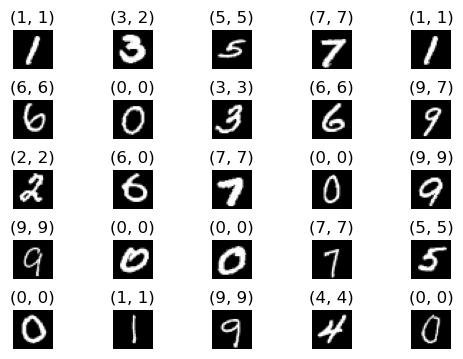

In [18]:
#Comparing the Neural Network output with the Actual output 
m,n =x_test.shape
fig, axs = plt.subplots(5, 5, figsize=(5, 4))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i in range(5):
    for j in range(5):
        random_index=np.random.randint(m)
        axs[i,j].imshow(x_test[random_index].reshape((28,28)),cmap='gray')  
        prediction = model.predict(x_test[random_index].reshape(1,784)) 
        y_hat=np.argmax(prediction )
        axs[i,j].set_title(f'{y_test[random_index,0],y_hat}')                         
        axs[i,j].set_axis_off()

In [22]:
#Comparing the Neural Network output with the Actual output 
m,n =x_test.shape
total=200
right=0
wrong=0
for i in range(200):
    prediction = np.argmax(model.predict(x_test[i].reshape(1,784)) )
    if(prediction == y_test[i,0]):
        right+=1
    else:
        wrong+=1
accuracy = (right/total) *100
print(accuracy, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━